
SAMPLING FOR MODEL 'probabilityjudgment' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.219103 seconds (Warm-up)
Chain 1:                0.202682 seconds (Sampling)
Chain 1:     

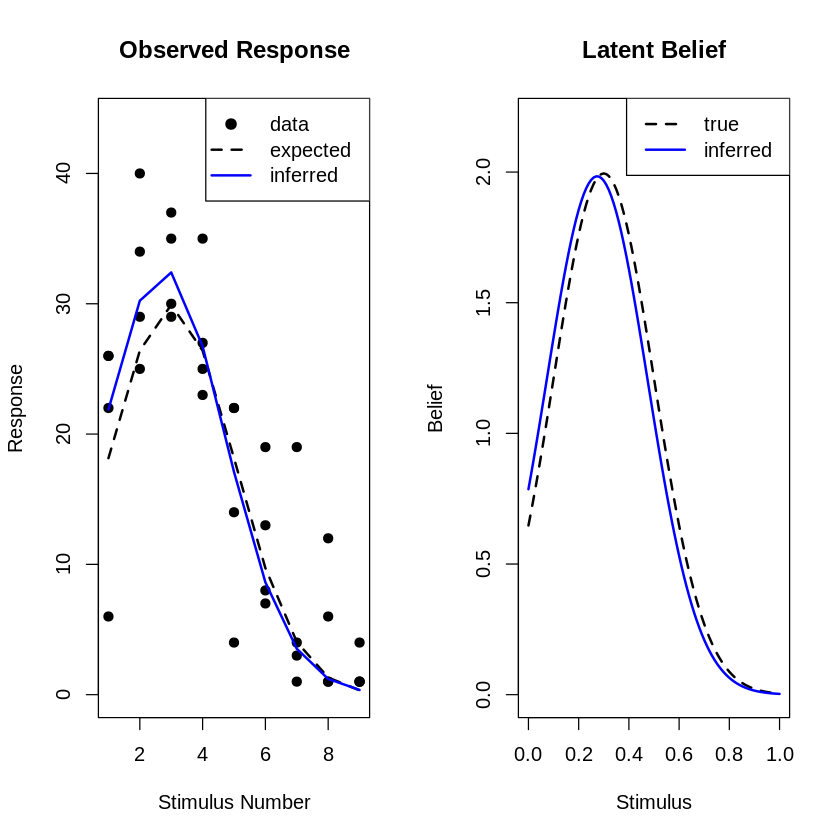

In [3]:
library(rstan)

# parameters
mu <- .3
sig <- .2
v <- 15
eps <- 7

# categories
x <-seq(.1,.9,.1)

# response strengths  
phi <- v * dnorm(x, mu, sig)
  
# generate simulated responses
y <- matrix(NA,9,4)
for(i in 1:9) {
  y[i,] <- round(rnorm(4,phi[i], eps))
}
y[y<1] <- 1
y[y>99] <- 99

# run stan
inputdata <- list(N = 9, M = 4, y = y, x = x)
outputdata <- stan(
   file = "./probabilityjudgment.stan",
   data = inputdata
)

# get posterior means for the various chains
parmean <- get_posterior_mean(outputdata)
phi_est <- parmean[grep("phi",rownames(parmean)),"mean-all chains"]
mu_est <- parmean[grep("mu",rownames(parmean)),"mean-all chains"]
sig_est <- parmean[grep("sigma",rownames(parmean)),"mean-all chains"]


# plot
layout(matrix(1:2,1,2))

# plot the raw data, along with the true expected response
plot(phi,type="l", ylim=c(0,max(y)*1.1), xlab = "Stimulus Number", ylab = "Response", 
     lty=2, lwd=2, main="Observed Response")
for(i in 1:4) lines(y[,i], type="p", pch=19)
legend(x="topright", legend=c("data", "expected", "inferred"), 
       lty=c(NA, 2,1), pch=c(19,NA,NA),
       lwd=2, col=c("black","black","blue"))

# overlay the model estimates of phi
lines(phi_est,lwd=2, col="blue")

# second plot to compare the model inferred belief distribution
# to the true one that generated the data
xv <- seq(0,1,.01)
b <- dnorm(xv,mu,sig)
plot(xv, b, lty=2,lwd=2, 
     xlab="Stimulus", ylab="Belief", type="l",
     main="Latent Belief", ylim=c(0,max(b)*1.1))
lines(xv, dnorm(xv, mu_est, sig_est), lwd=2, col="blue")
legend(x="topright", legend=c("true", "inferred"), lty=c(2,1), 
       lwd=2, col=c("black","blue"))

layout(1)